# Learning to recognize handwritten digits with a K-nearest neighbors classifier

In [1]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

# A. Loading and visualizing the digits data
We'll use scikit-learn's data access interface and take a look at this data:

(1) Load dataset digits, and print out the shape of digits.images, digits.data, and digits.target

In [2]:
digits = ds.load_digits()
digits.images.shape

(1797, 8, 8)

(2) Let's plot the first ten images using axes.imshow( ...  , cmap=plt.cm.gray)

    hints: use set_axis_off to remove the axis mark, and use set_title to mark the label for each image

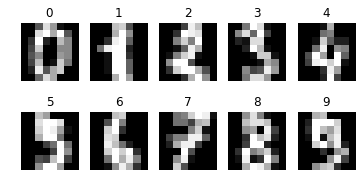

In [3]:
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))

for i in range(nrows):
    for j in range(ncols):
        k = j + i * ncols
        ax = axes[i, j]
        ax.imshow(digits.images[k, ...], cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title(digits.target[k])

(3) Print out the image data "digits.images" of the first image in the dataset

In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


(4) Print out the data "digits.data" of the first data in digits dataset

In [5]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


# B. Training

Use ms.train_test_split() to ceate your training and test dataset - by splitting X(which is data), y(which is target) into X_train/y_train and X_test/y_test

In [6]:
X = digits.data
y = digits.target
(X_train, X_test, y_train, y_test) = ms.train_test_split(X, y, test_size=.25)

Create the KNNeighborsClassifier model with nb.KNeighborsClassifier(), and train your model

In [7]:
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Score your model using test dataset

In [8]:
knc.score(X_test, y_test)

0.98

# C. Test on testset data

Pick one image data (ex, 18th test sample) from the testset and perform the predition.  

Show the predicted result, the ground truth, and the image.

Predicted Result : 0
Ground Truth: 0


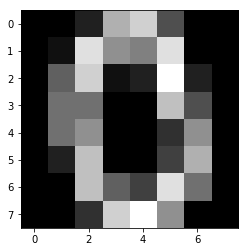

In [9]:
test_sample = X_test[18]
plt.imshow(test_sample.reshape(8,8), cmap=plt.cm.gray)
print('Predicted Result : %d' % knc.predict(test_sample.reshape(1,-1)))
print('Ground Truth: %d' % y_test[18])

Show the more results for verification with title of [predition]/ground truth

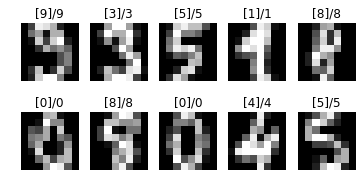

In [10]:
nrows, ncols = 2, 5
starting = 100
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))

for i in range(10):
    axes[int(i/ncols)][i%ncols].imshow(X_test[starting+i].reshape(8,8), cmap=plt.cm.gray)
    axes[int(i/ncols)][i%ncols].set_axis_off()
    axes[int(i/ncols)][i%ncols].set_title("%s/%s"%(knc.predict(X_test[starting+i].reshape(1,-1)), y_test[starting+i]))

# D. Test on your own test samples 

A. Create 5 or more test images, test the prediction result, and show both the image and prediction result.  

  hints: You may create images using numpy array, or load image files by using:
  
  import imageio
  
  imageio.imread("imagefile.jpg")

B. Discuss how the model performs.  Are the model prediction correct?  Why is the prediction correct/incorrect?  Anything you may do to improve the model?



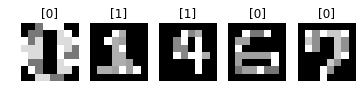

In [12]:
from skimage import io
from PIL import Image

test = []

for x in range (5):
    sample = Image.open('num'+str(x)+'.png').convert('L')
    sample.save('num'+str(x)+'.png')
    test.append(io.imread('num'+str(x)+'.png'))

nrows, ncols = 1, 5  

fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3), squeeze = False)

for i in range(5):
    axes[int(i/ncols)][i%ncols].imshow(test[i].reshape(8,8), cmap=plt.cm.gray)
    axes[int(i/ncols)][i%ncols].set_axis_off()
    axes[int(i/ncols)][i%ncols].set_title("%s"%(knc.predict(test[i].reshape(1,-1))))
    
# MODEL NOT GENERALIZED ENOUGH!!!!